In [5]:
from dm_tools_dataprep import data_prep

df = data_prep()

/Users/hanzhe/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41476 entries, 0 to 41475
Data columns (total 100 columns):
VehYear                              41476 non-null float64
VehOdo                               41476 non-null float64
MMRAcquisitionAuctionAveragePrice    41476 non-null float64
MMRAcquisitionAuctionCleanPrice      41476 non-null float64
MMRAcquisitionRetailAveragePrice     41476 non-null float64
MMRAcquisitonRetailCleanPrice        41476 non-null float64
MMRCurrentAuctionAveragePrice        41476 non-null float64
MMRCurrentAuctionCleanPrice          41476 non-null float64
MMRCurrentRetailAveragePrice         41476 non-null float64
MMRCurrentRetailCleanPrice           41476 non-null float64
VehBCost                             41476 non-null float64
WarrantyCost                         41476 non-null float64
IsBadBuy                             41476 non-null int64
Auction_ADESA                        41476 non-null uint8
Auction_MANHEIM                      41476 non-null ui

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# preprocessing step
df = data_prep()

# target/input split
y = df['IsBadBuy']
X = df.drop(['IsBadBuy'], axis=1)

In [8]:
# OverSampling

from imblearn.over_sampling import RandomOverSampler
from sklearn.neural_network import MLPClassifier
from collections import Counter

ros=RandomOverSampler(random_state=0)
rs = 10

X_mat = X.as_matrix()

X_train, X_test, y_train, y_test=train_test_split(X_mat, y, test_size=0.2, stratify=y,random_state=rs)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

print('Original database shape %s' % Counter(y_train))
print('Resampled database shape %s' % Counter(y_resampled))

/Users/hanzhe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


In [9]:
# Oversampling tree training
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

model = DecisionTreeClassifier(random_state=rs)
model.fit(X_resampled, y_resampled)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

In [7]:
print("Train accuracy:", model.score(X_resampled, y_resampled))
print("Test accuracy:", model.score(X_test, y_test))
y_pred2 = model.predict(X_test)
print(classification_report(y_test, y_pred2))

Train accuracy: 0.9994806633659938
Test accuracy: 0.7907425265188043
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      7222
           1       0.21      0.23      0.22      1074

   micro avg       0.79      0.79      0.79      8296
   macro avg       0.55      0.55      0.55      8296
weighted avg       0.80      0.79      0.79      8296



In [9]:
# grab feature importances from the model and feature name from the original X

import numpy as np

importances = model.feature_importances_
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]

for i in indices:
    print(feature_names[i], ':', importances[i])

VehBCost : 0.11634946681076537
VehOdo : 0.09670186762051042
MMRAcquisitionAuctionCleanPrice : 0.06541600689545407
MMRCurrentAuctionAveragePrice : 0.05971814547249137
MMRAcquisitionRetailAveragePrice : 0.0586767973582952
MMRAcquisitonRetailCleanPrice : 0.05685759086838311
MMRAcquisitionAuctionAveragePrice : 0.056527158838226545
MMRCurrentAuctionCleanPrice : 0.056357004071517655
VehYear : 0.05596899850886534
MMRCurrentRetailCleanPrice : 0.05437837575264805
MMRCurrentRetailAveragePrice : 0.052455646159117894
WarrantyCost : 0.04874446067786299
WheelType_Alloy : 0.02161539700871621
Auction_MANHEIM : 0.014963541806455144
VNST_TX : 0.009203227040695644
VNST_NC : 0.00903221686522076
VNST_FL : 0.008006356848749919
VNST_CA : 0.007316542651035041
VNST_CO : 0.006871603716882794
TopThreeAmericanName_GM : 0.006767843727049548


In [11]:
# visualize

import pydot
from io import StringIO
from sklearn.tree import export_graphviz

dotfile = StringIO()
export_graphviz(model, out_file=dotfile, feature_names=X.columns)
graph = pydot.graph_from_dot_data(dotfile.getvalue())
graph[0].write_png("OverSampledTree_1.png")

In [17]:
#retrain with a small max_depth limit

model = DecisionTreeClassifier(max_depth=3, random_state=rs)
model.fit(X_resampled, y_resampled)

print("Train accuracy:", model.score(X_resampled, y_resampled))
print("Test accuracy:", model.score(X_test, y_test))

y_pred2 = model.predict(X_test)
print(classification_report(y_test, y_pred2))

Train accuracy: 0.6331059792957795
Test accuracy: 0.563404050144648
              precision    recall  f1-score   support

           0       0.92      0.54      0.68      7222
           1       0.18      0.69      0.29      1074

   micro avg       0.56      0.56      0.56      8296
   macro avg       0.55      0.62      0.49      8296
weighted avg       0.83      0.56      0.63      8296



In [19]:
# grab feature importance from the model and feature name from the original X
importances = model.feature_importances_
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]

for i in indices:
    print(feature_names[i], ':', importances[i])

# visualize
dotfile = StringIO()
export_graphviz(model, out_file=dotfile, feature_names=X.columns)
graph = pydot.graph_from_dot_data(dotfile.getvalue())
graph[0].write_png("OversampledTree_2.png") # saved in the following file

VehOdo : 0.11010703741086605
VehBCost : 0.10883605167298097
MMRCurrentAuctionCleanPrice : 0.06411503947273658
MMRCurrentAuctionAveragePrice : 0.059611044344009226
MMRAcquisitionAuctionCleanPrice : 0.05881174712528088
MMRAcquisitionAuctionAveragePrice : 0.05877025120772889
MMRAcquisitonRetailCleanPrice : 0.0557570836982016
MMRAcquisitionRetailAveragePrice : 0.054940140775420754
MMRCurrentRetailCleanPrice : 0.05478761597477693
MMRCurrentRetailAveragePrice : 0.05064054349066412
WarrantyCost : 0.04769612367535727
VehYear : 0.04193922652276833
WheelType_Alloy : 0.017075337178964617
Auction_MANHEIM : 0.014706212132105394
VNST_TX : 0.012124323848710372
VNST_AZ : 0.007904203337086866
VNST_CA : 0.00762386709041947
VNST_FL : 0.006597079447374186
VNST_PA : 0.006239216790417745
Make_CHRYSLER : 0.005778076442135406


In [23]:
test_score = []
train_score = []

# check the model performance for max depth from 2-20
for max_depth in range(2, 21):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=rs)
    model.fit(X_resampled, y_resampled)
    
    test_score.append(model.score(X_test, y_test))
    train_score.append(model.score(X_resampled, y_resampled))

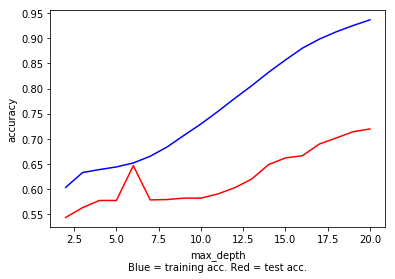

In [24]:
import matplotlib.pyplot as plt

# plot max depth hyperparameter values vs training and test accuracy score
plt.plot(range(2, 21), train_score, 'b', range(2,21), test_score, 'r')
plt.xlabel('max_depth\nBlue = training acc. Red = test acc.')
plt.ylabel('accuracy')
plt.show()

In [2]:
from sklearn.model_selection import GridSearchCV

In [10]:
# grid search CV
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(2, 10),
          'min_samples_leaf': range(20, 90, 10)}

cv = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs), cv=10)
cv.fit(X_resampled, y_resampled)

print("Train accuracy:", cv.score(X_resampled, y_resampled))
print("Test accuracy:", cv.score(X_test, y_test))

# test the best model
y_pred2 = cv.predict(X_test)
print(classification_report(y_test, y_pred2))

# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.7010525222449192
Test accuracy: 0.5835342333654774
              precision    recall  f1-score   support

           0       0.91      0.58      0.71      7222
           1       0.18      0.64      0.28      1074

   micro avg       0.58      0.58      0.58      8296
   macro avg       0.55      0.61      0.50      8296
weighted avg       0.82      0.58      0.65      8296

{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 20}


In [11]:
# grid search CV
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(4, 15),
          'min_samples_leaf': range(15, 25)}

cv = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs), cv=10)
cv.fit(X_resampled, y_resampled)

print("Train accuracy:", cv.score(X_resampled, y_resampled))
print("Test accuracy:", cv.score(X_test, y_test))

# test the best model
y_pred2 = cv.predict(X_test)
print(classification_report(y_test, y_pred2))

# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.7970778658726586
Test accuracy: 0.6442864030858245
              precision    recall  f1-score   support

           0       0.90      0.66      0.76      7222
           1       0.18      0.51      0.27      1074

   micro avg       0.64      0.64      0.64      8296
   macro avg       0.54      0.59      0.52      8296
weighted avg       0.81      0.64      0.70      8296

{'criterion': 'gini', 'max_depth': 14, 'min_samples_leaf': 15}


In [13]:
# do the feature importance and visualization analysis on GridSearchCV's best model
from dm_tools_OptTree import analyse_feature_importance, visualize_decision_tree

analyse_feature_importance(cv.best_estimator_, X.columns, 20)
visualize_decision_tree(cv.best_estimator_, X.columns, "optimal_tree_Oversampled.png")

VehBCost : 0.11607149082066442
VehYear : 0.10745359931235293
VehOdo : 0.09319083438800504
MMRCurrentAuctionAveragePrice : 0.07101135659569033
MMRAcquisitonRetailCleanPrice : 0.0642661717463186
MMRCurrentAuctionCleanPrice : 0.06336500531651117
MMRAcquisitionAuctionCleanPrice : 0.062016055507257695
MMRCurrentRetailCleanPrice : 0.05055005462808433
MMRAcquisitionAuctionAveragePrice : 0.04979976884597463
MMRAcquisitionRetailAveragePrice : 0.04717420145617384
WheelType_Alloy : 0.043789824665824754
MMRCurrentRetailAveragePrice : 0.04326646755557965
WarrantyCost : 0.04259648979701864
Auction_MANHEIM : 0.02870504280826561
WheelType_Covers : 0.012930049402425287
VNST_NC : 0.009189976153449221
VNST_TX : 0.008078016183804536
TopThreeAmericanName_GM : 0.007372298014827981
VNST_OK : 0.005655303730141145
Size_MEDIUM : 0.004721170682839098
